In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_dec_reg(X,y, classifier , resolution = 0.02 , test_idx=None):
    markers = ('s','x','o','^','v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    x1_min , x1_max = X[:,0].min()-1 , X[:, 0].max()+1
    x2_min , x2_max = X[:,1].min()-1 , X[:, 1].max()+1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution) , np.arange(x2_min , x2_max , resolution))
    Z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , Z , alpha=0.3 , cmap=cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    for idx, cl , in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl , 0], y=X[y==cl , 1], alpha=0.8 , c=colors[idx], marker=markers[idx], label=cl , edgecolor='black')
        if test_idx:
            X_test , y_test = X[test_idx , :] , y[test_idx]
            plt.scatter(X_test[: , 0] , X_test[: , 1] , c='None' , 
                        edgecolor = 'black' , alpha=1.0 , linewidth = 1 , 
                       marker='o' , s=100 , label='test set')

In [2]:
import numpy as np 
import pandas as pd
df = pd.read_csv('wine.data' , header=None)
X = df.iloc[:,1:14].values
y = df.iloc[:,0].values
df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X , y ,
     test_size = 0.3 , random_state=1 , stratify = y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)



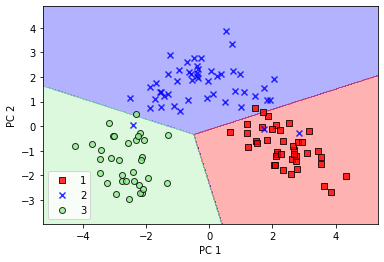

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca , y_train)
plot_dec_reg(X_train_pca , y_train , classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

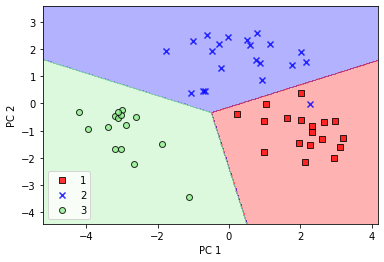

In [11]:
plot_dec_reg(X_test_pca , y_test , classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()